<a href="https://colab.research.google.com/github/ykato27/Regression-Models/blob/main/1_1_Scikit_learn%E3%81%A8Keras%E3%81%A7%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scikit-learn と Keras （とXGBoost）で回帰分析 

データ数の小さい同じ回帰問題に対して，多重線形回帰，ニューラルネットワーク，勾配ブースティング決定木を適用し，結果を比較します．それぞれ，scikit-learn，Keras (TensorFlow)，XGBoost というライブラリを用いて簡単に実装できます．

Regression analysis with Scikit-learn and Keras (and XGBoost)


Apply multiple linear regression, neural networks, and gradient boosting decision trees to the same regression problem with a small number of data, and compare the results. Each of these can be easily implemented using the scikit-learn, Keras (TensorFlow), and XGBoost libraries.

#1. Scikit-learn で線形回帰

Regression analysis with Scikit-learn

Scikit-learn（サイキット・ラーン）は機械学習の Python 用ライブラリ（プログラムの集まり）であり，（ディープラーニング以外の）「古典的」な機械学習の手法が簡単に使えます．ここでは多重線形回帰を用います．

Scikit-learn is a library of machine learning algorithms for Python that makes it easy to use "classical" machine learning methods (other than deep learning). Here we will use multiple linear regression.


まずは必要なライブラリをインストールしましょう．

First, let's install the necessary libraries.

In [1]:
# ライブラリのインポート
import matplotlib.pyplot as plt  # プロット用のライブラリを利用
import numpy as np  # numpyという行列などを扱うライブラリを利用
import pandas as pd  # pandasというデータ分析ライブラリを利用
import tensorflow as tf
from sklearn import linear_model  # 線形回帰のライブラリを利用
from sklearn.model_selection import train_test_split

# Set seed for experiment reproducibility
seed = 0  # この値を変えると結果が変わる
np.random.seed(seed)
tf.random.set_seed(seed)

次にボストンの平均住宅価格に関するデータセットを公開しているウェブページから読み込みます．以下のセルでは pandas という2次元データを扱うライブラリを使用しています．

このデータセットは14項目からなりますが，そのうち最初の13項目を入力データセット `x` とし，最後の平均価格を表す１項目を正解値 `y` とします．

Next, we load a dataset of average house prices in Boston from a public web page. In the following cells, we use pandas, a library for handling two-dimensional data.

The dataset consists of 14 items, of which we set the first 13 items as the input dataset `x` and the last item, which is the average price, as the correct answer `y`.

In [2]:
# Boston Housingのデータセットの読み込み
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
    header=None,
    sep="\s+",
)
df.columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
X = df.iloc[:, 0:13]
Y = df["MEDV"].values

X.head()  # 最初の5行を表示

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


データを各項目について平均0，分散1となるように線形変換する．

Linearly transform the data so that the mean is 0 and the variance is 1 for each column.

In [3]:
"""
各項目について平均0分散1になるようにデータを整形する．
 mean:    各項目の平均 X[i,j]のiに関する平均なので axis = 0とする．
 variance: 各項目の分散
 X_std:   整形したデータ　numpy配列
"""

mean = X.mean(axis=0)
variance = (X ** 2).mean(axis=0) - mean ** 2
X_std = np.array((X - mean) / np.sqrt(variance))

X_std[:5]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

データのうち，80%を学習用データとし，残りの20%を学習結果を評価するためのテストデータとします．

注：このようにデータ数が少ないときは通常分割交差検証法を用いますが、今回は簡単のためホールディング法を用いています。また、ハイパーパラメータの調整は行わないので、テストデータを評価に用いています。

Of the data, 80% will be used for training and the remaining 20% will be used as test data to evaluate the training results.

Note: When the number of data is small like this, the split cross-validation method is usually used, but in this case, the holding method is used for simplicity. Also, since we do not adjust the hyperparameters, we use the test data for evaluation.

In [4]:
# sklearn の train_test_split関数を用いて学習データとテストデータに分割する
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2)

In [5]:
"""
上と同じ内容をnumpyで書く場合
num:      データの数
est_size: テストデータの割合 
est:      テストデータのインデックスの集合
train:    訓練データのインデックスの集合
"""
np.random.seed(seed)

num = X_std.shape[0]
test_size = 0.2

# int(x)は小数点以下を切り捨てて整数に直す
test = np.random.choice(
    num, int(num * test_size), replace=False
)  # 非復元抽出（重複した選択を許さない）

# np.setdiff1d は集合としての引き算
train = np.setdiff1d(np.arange(num), test)

X_train, X_test, Y_train, Y_test = X_std[train], X_std[test], Y[train], Y[test]

線形回帰モデルを作成し，学習データで学習（最適化）します．

Create a linear regression model and train (optimize) it on the training data.

In [6]:
# 線形回帰モデルの生成および学習
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X_train, Y_train)

print("回帰式の係数")
print("y切片：", clf.intercept_)
print("各項目の係数", clf.coef_)

回帰式の係数
y切片： [22.49149087]
各項目の係数 [-0.985081    0.98675503 -0.09132746  0.63396552 -1.75305838  2.64245146
 -0.13207305 -2.87210314  1.76057906 -1.45703583 -2.2519915   0.74566466
 -3.49331966]


テストデータに対して予測値と正解値の差の2乗の平均値（平均2乗誤差）を計算します．

Calculates the average of the squared difference between the predicted value and the correct answer (mean square error) for the test data.

In [7]:
# テストデータに対する2乗誤差の平均
Y_pred = clf.predict(X_test)
SME = np.mean((Y_pred - Y_test) ** 2)
print("テストデータに対する2乗誤差の平均", SME)

テストデータに対する2乗誤差の平均 33.9164162321957


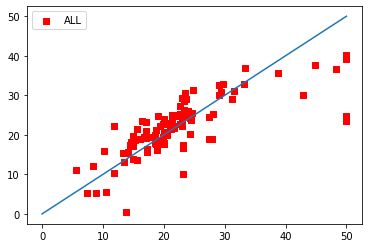

In [8]:
# 結果の可視化
# 横軸：教師データの値（真の価格），縦軸：予測値
plt.scatter(Y_test, Y_pred, c="r", marker="s", label="ALL")
plt.legend()
plt.plot([0, 50], [0, 50])
plt.show()

与えられたデータに対する予測を計算し正解値と比較してみましょう．

Calculate the prediction for the given data and compare it to the correct answer.

In [9]:
# 与えられたデータに対する予測

compare = pd.DataFrame(np.array([Y_test, Y_pred]).T)
compare.columns = ["正解", "予測値"]
compare[:20]

,正解,予測値
0,22.6,25.329786
1,50.0,23.608716
2,23.0,29.302844
3,8.3,12.148374
4,21.2,21.521844
5,19.9,19.342418
6,20.6,20.421221
7,18.7,21.224382
8,16.1,18.868582
9,18.6,20.031376


#2. Kerasで回帰分析

Keras はディープラーニング用のライブラリである TensorFlow などを使いやすくするライブラリです。以下では，Keras を使ってボストンの住宅価格を予測するニューラルネットワークを作成し，学習させます．

注：Keras は現在 TensorFlow の公式ライブラリとなっていて，このページでもそれを用いています．

Keras is a library that makes it easy to use deep learning libraries such as TensorFlow. In the following, we will use Keras to create and train a neural network to predict housing prices in Boston.

Note: Keras is now an official library of TensorFlow, which is also used in this page.

Sequential というクラスを用いて，

入力13次元 --- 1000次元 --- 800次元 --- 100次元 --- 出力1 次元

というニューラルネットワークを作成します．



```
model.add(Dense(1000, activation = 'relu'))
```

により，ニューロン数が1000で活性化関数が ReLU の層が追加されます．

Using the class Sequential, create a neural network with the following dimensions.

 Input 13 --- 1000 --- 800 --- 100 --- Output: 1

The above code adds a layer with 1000 neurons and an activation function of ReLU.

In [10]:
"""
ニューラルネットワークモデルの生成
モデルの構成は
入力(13次元)-1000次元-800次元-100次元-予測値(1次元)
Sequential()というのは入力から枝分かれせずに書けるモデルのクラス
Dense()は全結合層
activation は活性化関数，ここではReLUを用いている
"""

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(1000, activation="relu"))
model.add(Dense(800, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1))

最適化手法として SGD（確率的勾配降下法）を用い，誤差関数として平均2乗誤差を用います．

The SGD (stochastic gradient descent) is used as the optimization method, and the mean squared error is used as the error function.

In [11]:
"""
モデルをコンパイル
コンパイルすることで逆伝搬などが準備される
最適化関数として SGD を指定
誤差関数には平均2乗誤差を指定
"""

from tensorflow.keras.optimizers import SGD

model.compile(SGD(lr=1e-4), loss="mean_squared_error")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


トレーニングデータで100エポック（つまりデータセットを100周）学習し，テストデータで評価します．バッチサイズというのは学習において1度に入力するデータ数のことです．

We train on the training data for 100 epochs (i.e., 100 rounds of the dataset) and evaluate on the test data. Batch size refers to the number of data to be input at a time during training.

In [12]:
"""
トレーニングデータで学習し，テストデータで評価

batch_size:       ミニバッチのデータ数
epochs:           全部のデータについて処理する回数 1epoch = 1周
verbose:          表示の形式，0だと何も表示されない
validation _data: 評価用データ（ここではハイパーパラメータの調整をしないので
                  テストデータをそのまま用いている）
"""
history = model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=150,
    verbose=1,
    validation_data=(X_test, Y_test),
)

Epoch 1/150
4/4 [==============================] - 1s 105ms/step - loss: 599.5038 - val_loss: 577.1812
Epoch 2/150
4/4 [==============================] - 0s 21ms/step - loss: 594.5575 - val_loss: 572.4009
Epoch 3/150
4/4 [==============================] - 0s 21ms/step - loss: 589.3696 - val_loss: 567.9417
Epoch 4/150
4/4 [==============================] - 0s 23ms/step - loss: 584.5255 - val_loss: 563.4086
Epoch 5/150
4/4 [==============================] - 0s 20ms/step - loss: 579.6160 - val_loss: 558.4280
Epoch 6/150
4/4 [==============================] - 0s 19ms/step - loss: 574.2336 - val_loss: 553.4898
Epoch 7/150
4/4 [==============================] - 0s 23ms/step - loss: 568.9161 - val_loss: 548.1368
Epoch 8/150
4/4 [==============================] - 0s 22ms/step - loss: 563.1198 - val_loss: 542.4230
Epoch 9/150
4/4 [==============================] - 0s 22ms/step - loss: 556.9019 - val_loss: 535.8937
Epoch 10/150
4/4 [==============================] - 0s 20ms/step - loss: 549.7825

loss および val_loss はそれぞれ訓練データ，テストデータに対する平均2乗誤差の値であり，最後の結果を見ると線形回帰よりも小さくなっています．つまり，この場合ニューラルネットワークの方が予測精度が良くなっているということになります．

Loss and val_loss are the mean squared error values for the training and test data, respectively, and the last result shows that they are smaller than the linear regression. This means that in this case the neural network has a better prediction accuracy.

学習の過程における，学習データに対する誤差 `loss` とテストデータに対する誤差 `val_loss` を折れ線グラフで表示します．

A line graph showing the error `loss` over the training data and the error `val_loss` over the test data during the training process.

4/4 [==============================] - 0s 4ms/step - loss: 29.8349
2乗誤差の平均 29.83491325378418


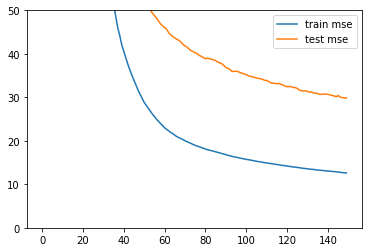

In [13]:
# pyplotを用いて結果を表示する
# model.evaluate() は予め決められた評価指標に従って評価を行う．
print("2乗誤差の平均", model.evaluate(X_test, Y_test))

# 学習の履歴は model.fit()の出力に historyとして含まれているので，それを取り出す．
train_acc = history.history["loss"]
test_acc = history.history["val_loss"]

x = np.arange(len(train_acc))
plt.plot(x, train_acc, label="train mse")
plt.plot(x, test_acc, label="test mse")
plt.ylim(0, 50)  # y軸の範囲の指定
plt.legend()  # グラフの線の説明を表示
plt.show()

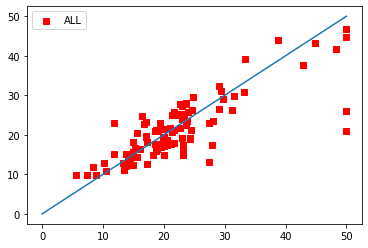

In [14]:
# 結果の可視化
# 横軸：教師データの値（真の価格），縦軸：予測値
Y_pred = model.predict(X_test).flatten()
plt.scatter(Y_test, Y_pred, c="r", marker="s", label="ALL")
plt.legend()
plt.plot([0, 50], [0, 50])
plt.show()

与えられたデータに対する予測値と正解値を比較してみましょう．

Compare the predicted values with the correct values for the given data.

In [15]:
# 与えられたデータに対する予測

compare = pd.DataFrame(np.array([Y_test, Y_pred]).T)
compare.columns = ["正解", "予測値"]
compare[:20]

,正解,予測値
0,22.6,25.169786
1,50.0,21.048201
2,23.0,27.419147
3,8.3,11.775565
4,21.2,17.633320
5,19.9,19.103039
6,20.6,18.626226
7,18.7,21.333221
8,16.1,16.494852
9,18.6,17.602228


#3. 勾配ブースティング決定木で予測 

Kaggleコンペティションでボストン住宅価格のようなテーブルデータに対してよく用いられる勾配ブースティング決定木でも学習を行ってみましょう．なお，勾配ブースティング決定木は決定木を用いた機械学習の一手法であり，ニューラルネットワークではありません．

Prediction with gradient boosting decision tree

Let's also try training with gradient boosting decision trees, which are often used in Kaggle competitions for table data such as Boston house prices. Note that gradient boosting decision trees are a machine learning method using decision trees, not neural networks.



In [16]:
import xgboost as xgb  # xgboostは勾配ブースティング決定木のためのライブラリ

np.random.seed(seed)

bmodel = xgb.XGBRegressor()
bmodel.fit(X_train, Y_train)

[11:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [17]:
# テストデータに対する2乗誤差の平均
Y_pred = bmodel.predict(X_test)  # bst.predict(dtest)
SME = np.mean((Y_pred - Y_test) ** 2)
print("テストデータに対する2乗誤差の平均", SME)

テストデータに対する2乗誤差の平均 20.753867059033112


何も工夫していないにもかかわらず，上のニューラルネットワークの結果よりも精度が良くなりました．確かに，XGBoostはテーブルデータには強いようです．

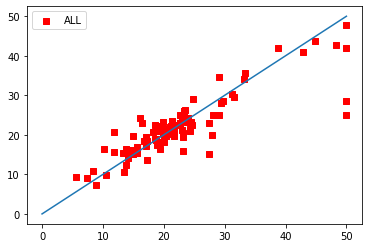

In [18]:
# 結果の可視化
# 横軸：教師データの値（真の価格），縦軸：予測値
plt.scatter(Y_test, Y_pred, c="r", marker="s", label="ALL")
plt.legend()
plt.plot([0, 50], [0, 50])
plt.show()

In [19]:
# 与えられたデータに対する予測

compare = pd.DataFrame(np.array([Y_test, Y_pred]).T)
compare.columns = ["正解", "予測値"]
compare[:20]

,正解,予測値
0,22.6,25.113623
1,50.0,28.514503
2,23.0,23.494480
3,8.3,10.925487
4,21.2,22.291832
5,19.9,20.589832
6,20.6,20.957613
7,18.7,20.940041
8,16.1,24.254385
9,18.6,18.989843


# 4. 深層学習のテクニックを使ってNNを改良

Improving the NN with deep learning techniques.

##前処理 Preprocessing

カテゴリカルデータをワンホットエンコーディングする

One-hot encoding of categorical data

In [20]:
"""
カテゴリーデータをワンホットエンコーディング
"""

X_embed = pd.get_dummies(X, columns=["ZN", "CHAS", "RAD"])
X_embed  # 23814 rows × 879 columns

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,ZN_0.0,ZN_12.5,ZN_17.5,ZN_18.0,ZN_20.0,ZN_21.0,ZN_22.0,ZN_25.0,ZN_28.0,ZN_30.0,ZN_33.0,ZN_34.0,ZN_35.0,ZN_40.0,ZN_45.0,ZN_52.5,ZN_55.0,ZN_60.0,ZN_70.0,ZN_75.0,ZN_80.0,ZN_82.5,ZN_85.0,ZN_90.0,ZN_95.0,ZN_100.0,CHAS_0,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [21]:
# 数値データとカテゴリカルデータに分離

X_real = X_embed.iloc[:, :10]
X_category = X_embed.iloc[:, 10:]

X_real

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [22]:
"""
数値データのみ正規化し，カテゴリカルデータと結合
"""

mean = X_real.iloc[:, :10].mean(axis=0)
variance = (X_real ** 2).mean(axis=0) - mean ** 2
X_real_std = np.array((X_real - mean) / np.sqrt(variance))

X_std = np.concatenate([X_real_std, X_category], axis=1)
X_std

array([[-0.41978194, -1.2879095 , -0.14421743, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41733926, -0.59338101, -0.74026221, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41734159, -0.59338101, -0.74026221, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.41344658,  0.11573841,  0.15812412, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40776407,  0.11573841,  0.15812412, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41500016,  0.11573841,  0.15812412, ...,  0.        ,
         0.        ,  0.        ]])

前処理したデータを学習データとテストデータに分離

Separate preprocessed data into training data and test data

In [23]:
np.random.seed(seed)

num = X_std.shape[0]
test_size = 0.2

# int(x)は小数点以下を切り捨てて整数に直す
test = np.random.choice(
    num, int(num * test_size), replace=False
)  # 非復元抽出（重複した選択を許さない）

# np.setdiff1d は集合としての引き算
train = np.setdiff1d(np.arange(num), test)

X_train_new, X_test_new, Y_train_new, Y_test_new = (
    X_std[train],
    X_std[test],
    Y[train],
    Y[test],
)

データを分割し直したので，前と同じ分割になっているか確認する

Since the data has been re-split, check to see if the split is the same as before.

In [24]:
Y_train - Y_train_new

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
"""
ニューラルネットワークモデルの生成
モデルの構成は　47-2000-1000-1
Sequential()というのは入力から枝分かれせずに書けるモデルのクラス
Dense()は全結合層
kernel_regularizer=regularizers.l1(1e-2)は係数0.01でのL1正則化
kernel_regularizer=regularizers.l2(1e-3)は係数0.001でのL2正則化
kernel_regularizer=regularizers.L1L2(l1=1e-2, 1e-3)は係数0.01でのL1正則化と係数0.001でのL2正則化を同時に行う
BatchNormalization()はバッチ正規化
Dropout(0.5)は忘却率0.5のドロップアウト
"""

from keras import regularizers
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Dense,
    Dropout,
    LeakyReLU,
    ReLU,
)
from tensorflow.keras.models import Sequential

tf.random.set_seed(seed)


def NN():
    model = Sequential()
    model.add(Dense(2000, kernel_regularizer=regularizers.l1(1e-2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.5))
    model.add(Dense(1000, kernel_regularizer=regularizers.l2(1e-3)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_regularizer=regularizers.L1L2(l1=1e-2, l2=1e-3)))
    return model

最適化手法として Adam という SGD（確率的勾配降下法）の改良版を用い，誤差関数として平均2乗誤差を用います．

An improved version of SGD (stochastic gradient descent) called Adam is used as the optimization method, and mean squared error is used as the error function.

In [26]:
"""
モデルをコンパイル
コンパイルすることで逆伝搬などが準備される
最適化関数として Adam を指定
誤差関数には平均2乗誤差を指定
"""

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam


# schedulerの設定
def step_decay(epoch):
    x = 0.001
    if epoch >= 80:
        x = 0.0002
    if epoch >= 160:
        x = 0.00005
    return x


decay = LearningRateScheduler(step_decay, verbose=0)

model = NN()
model.compile(
    Adam(lr=1e-3), loss="mean_squared_error", metrics="mean_squared_error"
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [27]:
"""
トレーニングデータで学習し，テストデータで評価

batch_size:       ミニバッチのデータ数
epochs:           全部のデータについて処理する回数 1epoch = 1周
verbose:          表示の形式，1が標準，0だと何も表示されない
validation _data: 評価用データ（ここではハイパーパラメータの調整をしないので
                  テストデータをそのまま用いている）
"""
history = model.fit(
    X_train_new,
    Y_train_new,
    batch_size=128,
    epochs=250,
    verbose=1,
    validation_data=(X_test_new, Y_test_new),
)
print("Loss for training data")
model.evaluate(X_train_new, Y_train_new)
print("Loss for test data")
model.evaluate(X_test_new, Y_test_new)

Epoch 1/250
4/4 [==============================] - 1s 121ms/step - loss: 604.8790 - mean_squared_error: 577.9709 - val_loss: 603.1503 - val_mean_squared_error: 576.9091
Epoch 2/250
4/4 [==============================] - 0s 62ms/step - loss: 496.3725 - mean_squared_error: 470.3428 - val_loss: 575.8706 - val_mean_squared_error: 550.3547
Epoch 3/250
4/4 [==============================] - 0s 61ms/step - loss: 414.8217 - mean_squared_error: 389.4795 - val_loss: 549.5713 - val_mean_squared_error: 524.6725
Epoch 4/250
4/4 [==============================] - 0s 61ms/step - loss: 351.0178 - mean_squared_error: 326.2816 - val_loss: 524.8989 - val_mean_squared_error: 500.5741
Epoch 5/250
4/4 [==============================] - 0s 57ms/step - loss: 289.3021 - mean_squared_error: 265.1241 - val_loss: 502.0856 - val_mean_squared_error: 478.2838
Epoch 6/250
4/4 [==============================] - 0s 59ms/step - loss: 238.5402 - mean_squared_error: 214.8752 - val_loss: 479.7882 - val_mean_squared_error: 

[24.66853141784668, 17.031238555908203]

L2正則化を用いているので，'Loss' とは別に 'mean_squared_error' が表示されています．'Loss'の方にはL2誤差が入っているので，予測誤差としては， 'mean_squared_error' の方を使います．

Since we are using L2 regularization, 'mean_squared_error' is displayed separately from 'Loss'.
Since the 'Loss' contains the L2 error, we use the 'mean_squared_error' as the prediction error.

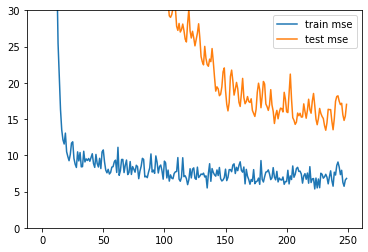

In [28]:
# pyplotを用いて結果を表示する

# 学習の履歴は model.fit()の出力に historyとして含まれているので，それを取り出す．
train_acc = history.history["mean_squared_error"]
test_acc = history.history["val_mean_squared_error"]

x = np.arange(len(train_acc))
plt.plot(x, train_acc, label="train mse")
plt.plot(x, test_acc, label="test mse")
plt.ylim(0, 30)  # y軸の範囲の指定
plt.legend()  # グラフの線の説明を表示
plt.show()

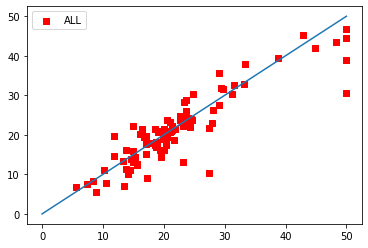

In [29]:
# 結果の可視化
# 横軸：教師データの値（真の価格），縦軸：予測値
Y_pred = model.predict(X_test_new).flatten()
plt.scatter(Y_test_new, Y_pred, c="r", marker="s", label="ALL")
plt.legend()
plt.plot([0, 50], [0, 50])
plt.show()

与えられたデータに対する予測値と正解値を比較してみましょう．

Compare the predicted values with the correct values for the given data.

In [30]:
# 与えられたデータに対する予測

compare = pd.DataFrame(np.array([Y_test_new, Y_pred]).T)
compare.columns = ["正解", "予測値"]
compare[:20]

,正解,予測値
0,22.6,24.870491
1,50.0,30.497192
2,23.0,23.209650
3,8.3,8.431162
4,21.2,20.892458
5,19.9,18.833494
6,20.6,23.745808
7,18.7,18.312002
8,16.1,20.273014
9,18.6,17.556124
